# Exemplu algoritm Q-learning
## Introducere

In cadul aceste lucrari se va incerca contruirea unui model matematic care poate ofera intructiuni unui agent ( masina, avion, robot ) sa indeplineasca anumite sarcini ( sa ajunga intr-o anumita locatie), si daca este cazul, sa fie cat mai optim.

Un algoritm care ne poate ajuta sa creeam un asemenea model este cel de Q-Learning.

Conform Wikipedia: Q-Learning este o tehnică de învățare automată care asociază o utilitate pentru fiecare pereche stare-acțiune. Elementele de bază sunt : agent, stare, acțiune, recompensă. La orice moment, agentul se află într-o anumită stare și decide asupra uneia dintre mai multe acțiuni. Pentru acțiunea sa, agentul primește o recompensă.

![exemplu](https://www.novatec-gmbh.de/wp-content/uploads/1_mPGk9WTNNvp3i4-9JFgD3w.png)

![exemplu](https://cml.rhul.ac.uk/images/inventions/qlearning.jpg)

Q-Learning isi are originile in programarea dinamica, scopul sau fiind sa optimize deciziile agentului bazanduse pe posibilele recompense care duc la o solutie optima.

Pentru a stabili valoarea acestor recompense pentru stare a agentului conforme actiuni luate, Q-Learning foloseste un table de valori denumit Q-Table.

![image.png](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Q-Learning_Matrix_Initialized_and_After_Training.png/880px-Q-Learning_Matrix_Initialized_and_After_Training.png)

Pentru fiecare stare a mediul in care se afla agentul, ii se asociaza setul de actiuni disponibile.

![exmplu](https://www.researchgate.net/profile/Nurmin-Bolong/publication/224256471/figure/fig1/AS:419086120046593@1476929325476/Q-Learning-algorithm-flow-chart_Q320.jpg)

Ex. Sa ne imaginam ca avem un pendul simplu care este actionat de un motor, si dorim sa trimitem instructiuni motorului sa aduca pendulul intr-o anumita pozitie. Stare acestui mediu va fi reprezentata de pozitia pendulului, indicata de diferenta dintre unghiul current al pendului si pozitia dorita. Setul de actiuni disponibile ale motorului sunt: `roteste la stanga`, `roteste la dreapta`. Iar atat timp cat pendulul nu se afla la pozitia dorita, se vor aplica penalizare ( o recompensa negativa ).

![examplu](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSkYwRICZrHI9XxVs2slUG6WLZ8rI3ClcaPBA&usqp=CAU)

Tabelul Q va fi urmatorul:

| Pozitie  (grade) | Roteste la stanga | Roteste la dreapta
| --- | :---: | :---: |
| -180 | 0 | 0|
| -170 | 0 | 0 |
| ... | 0 | 0 |
| 0 | 0 | 0 |
| 1 | 0 | 0 |
| 2 | 0 | 0 |
| ... | 0 | 0 |
|180| 0 | 0 |


Rolul algoritmului va fi sa sa determine valorile din tabel pentru care agentul va obtine o recompensa cat mai mare. In cele din urma aratand in aceste fel:

| Pozitie  (grade) | Roteste la stanga | Roteste la dreapta
| --- | :---: | :---: |
| -180 | -5 | -5|
| -170 | -3 | -12 |
| ... | ... | ... |
| -1 | -2 | -30|
| 0 | 0 | 0 |
| 1 | -28 | -2 |
| 2 | -24 | -3 |
| ... | ... | ... |
|180| -5 | -5 |

Putem oberserva ca daca diferenta este pozitiva, agentul va transmita motorului sa roteasca pendulul la dreapta, deoarece valoarea Q al acelei actiuni in starea respectiva este mai mare, iar pentru cealalta se poate vedea ca nu duce la o solutie bun din cauza numarului mare de penalizari cumulate. Opusul de intampla pentru cazul cand diferenta este negativa. 

Se observa ca atunci cand diferenta este 0, ambele actiuni au valoarea maxima, indicand starea la care trebuie ajunga agentul. De asemenea, atunci cand agentul de afla la `-180` sau `180`, ambele actiuni au aceiasi valoare, indicand o stare in care ambele actiuni pot duce la o solutie optima.

**Un lucru foarte important de retinut este faptul ca algoritmul tine cont doar de acest tabel, iar optimizarea se face folosind doar recompensele. Q-Learning este un algoritm cu forma libera a mediului, asa ca nu tine cont de modul in care mediul este contruit sau functioneaza. Asadar, daca am dorii sa adaugam mai multe variable de mediu in acesta simulare, precum: gravitatie, frecare, etc. nu trebuie sa le exprimam in tabel (de cele mai multe ori), intrucat efectul lor se va observa in valorile Q din tabel.**

**Este foarte important sa avem un model bun pentru exprimarea starilor si valoarea recompenselor.**


## Problema

Fie o masina in continua miscare si aflata intr-o pozitie aleatorie, sa se determine decizii optime pentru care masina poate sa ajunga la o locatia arbitrara. Viteza masinii este de `5 m/s`, rata de rotatie este de `45 grade`, iar distanta maxima fata de locatie este de `200 de metri`. Actiunile posibile sunt: `pastreaza directia`, `viraj la stanga`, `viraj la dreapta`.



# Rezolvare
## Detele problemei

Setul de actiuni pe care masina ce le poate face le vom numii `spatiul actiunilor` si aceste vor fi identificare printr-un cod.

| Actiune | Cod |
| ---: | --- |
| Pastreaza directia | 0 |
| Viraj la stanga | 1 |
| Viraj la dreapta | 2 |

De asemene, pentru lucrul cu matrici si alte formule matematice ne vom folosii de libraria [numpy](https://numpy.org) care poate oferii functii precum celor din `Matlab`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import copy
%matplotlib inline

# Datele problemei
car_speed = 5 # viteza masinii
turn_rate = 45 # rata de intoarcere
max_distance = 200 # distanta maxima posibila
action_space = [0, 1, 2] # [pastreaza_directia, viraj_stanga, viraj_dreapta]
car_position = np.array([90, 90]) # positia 2D a masinii
location_position = np.array([0, 0]) # positia 2D a locatiei
location_size = 13 # raza locatiei

## Contruirea tabelului de valori Q => Q-Tabel

Pentru a contrui aceste tabel, vom modele spatiul starilor in felul urmator:

Prima stare va fi reprezentata de distanta de la locatia pana la masina, iar a doua stare va fi unghiul dintre vectorul de directe al masinii si vecturul directie care arata spre locatie.

### Stabilirea recompenselor si penalizarilor

Daca masina/agentul se la destinatie va primii `100 de puncte`

Daca masina/agentul nu se la destinatie va fi penalizat cu `1 punct` - daca nu penalizam agentul ca nu a gasit inca locatie, acesta nu va gasii un drum optim, intrucat nu-l costa nimic sa piarda timpul trecand prin mai multe stari.

Daca masina/agentul trece de distanta maxima admisa va fi penalizat cu `100 de puncte`

### Discretizare

Acum ambele stari sunt valori reale, nu le putem reprezenta pe toate in tabel. De aici precizarile si restrictiile impuse in problema.

Vom folosii urmatoarea regula de discretizare.

Cum viteza masinii este de `5 m/s`, iar distanta maxima admisa este `200 de metrii`. Starile posibile vor fi `[0, 5, 10, 15, 20, 25, 30, ..., 185, 190, 195]`. Aceste sunt distantele pe care le poate avea masina **daca ar merge in line dreapta**. Acest spatiu nu acopera toate posibilitatii, cu cat dorim sa fim mai precisi cu atat trebuie sa alocam mai mult spaiu pentru tabel. **Dimensiunea aceste stari este data de formula `[distanta_maxima / viteza_masina]`**

| Pozitie tabel | Valoarea distanta |
| --: | :--- |
| 0 | 0 |
| 1 | 5 |
| 2 | 10 |
| 3 | 15 |
| ... | ... |
| 39 | 195 |


Aplicam acelasi lucru si in cazul unghiului. Starile posibile vor fi `[0, 45, 90, 135, 180, 225, 270, 315]`. **Dimensiunea aceste stari este data de formula `[360 / rata_de_rotatie]`**

| Pozitie tabel | Valoarea unghi |
| --: | :--- |
| 0 | 0 |
|1 | 45 |
| 2 | 90 |
| 3 | 135 |
| ... | ... |
| 7 | 315 |

Prin urmate, spatiul starilor este dat de multimea formata din perechile `(distanta,unghi)` care are `40 * 8 = 320` de perechi.

| Distanta \ Unghi | 0 | 1 | ... | 7 | 
| ---: | :---: | :----: | :----: | :---: |
| 0 | (0, 0) | (0, 45) | ... | (0, 315) |
| 1 | (10, 0) | (10, 45) | ... | (10, 315) |
| ... | ... | ... | ... | ... |
| 39 | (195, 0) | (195, 10) | ... | (195, 315) |


### Q-Tabel

Cum fiecarei perechi din spatiul starilor ii se asociaza actiunile din spatiul actiunilor, numarul total de elemente din tabelul de valori Q va fi: `numar_stari * numar_actiuni = 320 * 3 = 960`.

#### **Pozitia unui element din tabelul de valori Q va fi data de formula: `(distanta*, unghi*, actiune)`. Unde `distanta*, unghi*` este pozitia valorii discretizate din tabelele de mai sus - care poate fi calculate cu formulele: `[distanta/viteza] si [unghi/rata_de_rotatie]`,unde `[]` reprezinta partea intreaga.  Exemplu: `(1, 2, 1) -> distanta de 10 metrii, cu unghiul de 90 de grade pentru actiune 1 - viraj la stanga`**

Forma tabelului va fi: `(distance, unghiuri, actiuni) = (40, 8, 3)`

In [ ]:
# Tabel de valori Q
dim_Q = ( max_distance // car_speed, 360 // turn_rate, len(action_space) )
Q_table = np.random.uniform(low=-2, high=0, size=dim_Q) # creez o m

## Definire Agent

Agentul va fi masina, iar observarea lui inseamna determinarea pozitiei actuale si a vectorului de directie.

In [ ]:
class Agent:
  def __init__(self, position, direction, turn_rate, speed):
    self.pos = position.astype(np.float64)
    self.dir = direction
    self.turn_rate = turn_rate
    self.speed = speed
  
  # calculez noua pozitia in functia de actiunea data
  def apply_action(self, action):
    # print(f"Actiune: {action}")
    if action == 2:
      # print("Viraj la dreapta")
      self.dir += self.turn_rate
      if self.dir >= 360:
        self.dir = self.dir - 360
    elif action == 1:
      # print("Viraj la stanga")
      self.dir -= self.turn_rate
      if self.dir < 0:
        self.dir = 360 - self.dir 

    self.pos = self.pos + self.get_vector_direction() * self.speed

  # calculez vectorul de directie
  def get_vector_direction(self):
    return np.array([ np.cos(np.deg2rad(self.dir)) ,  np.sin(np.deg2rad(self.dir))])
  
  # returnez pozitia actuala si vectorul de directie
  def observe(self):
    return self.pos, self.get_vector_direction()

  def __str__(self):
    return f"Pos: {self.pos}, Dir: {self.dir}"

## Aplicare Q-Learning

Inainte sa incepem, vom stabili un vocabular:

Iteratie - moment de rulare. In cazul nostru acest moment va fi reprezentat de timp, si anume fiecare iteratie reprezinta `o secunda`

Episod - sesiune de rulare, in care agentul incearca sa rezolve sarcina in iteratiile alocate. In cazul nostru, un episod are `250 de iteratii` - in mediul nostru agentul are la dispozitie maxim `250 de secunde` sa-si indeplineasca sarcina.

Formula pe care o vom folosii este: ![formula](https://pythonprogramming.net/static/images/reinforcement-learning/new-q-value-formula.png)

**Rata de invatare ( learning rate )** - determina cat de mult informatia noua va influenta informatia veche. Daca valoarea este 0, agentul nu invata nimic, informatia fiind pierduta. Pentru valoarea 1, agentul foloseste numai informatia nou, cea veche nu este luata in considerare.

**Reducere ( discount )** - determina importanta viitoarele recompense. Pentru valoarea 0, agentul va considera numai castigurile imediate ( gandire pe termen scurt ). Pentru o valoarea mai mare ca 0, agentul va considera si castigurile viitoare ( gandire pe termin lung ). Cele mai uzuale valori sunt in intervalul `[0.9, 0.99]`

**Rata de explorare sau exploatare - in cazul nostru denumita $\epsilon$** - aceasta nu apare in formula, dar va fi folosit la determinarea unei actiuni. Ca sa avem sansa sa gasim o solutie optima, trebuie sa oferim algoritmului sansa sa testeze cat mai multe posiblitati. O strategie este ca in primele episoade, sa avem acestea valoare cat mai mare care sa faca agentul sa fie cat mai `curios` - sa aleaga o actiune aleatoare in locul celei mai bune. Aceasta curiozitate o vom numii `faza de explorare`. Pentru valorii mici sau chiar nule, algoritmul se va folosii mai mult de datele deja colectate, incercand sa gaseasca in acestea solutia optima - numita si `faza de exploatare`

In [ ]:
EPISODES = 14000 # Numar de episoade pentru care vom face invatarea
EPISODE_ITERATIONS = 250 # Numarul de iteratii maxime al fiecarui episod
LEARNING_RATE = 0.1 # rata de invatare
DISCOUNT = 0.95 # reducerea

# episodul de la care vom incepe sa micsoram rata de explorare
START_EPSILON_DECAYING = 200 
# episodul de la care vom elimina rata de explorare - agentul va fi numai in faza de exploatare
END_EPSILON_DECAYING = int( EPISODES * 0.7 ) 
# rate initiala de explorare
epsilon = 1
# valoarea nu ce care va fi redusa rata de explorare
epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

# Date pentru analizat
rewards = [] # recompensele pentru fiecare episod
best_reward = -1000 # recompensa maxima atinsa
best_agent_positions = [] # drumul parcurs de agent in episodul cu cea mai mare recompensa
best_Q_table = copy.deepcopy(Q_table) # valori Q pentru pentru episodul cu cea mai mare recompensa

### Functii utilitare

In [ ]:
# calculeaza distanta de la locatia la masina
def compute_distance_from( car_pos ):
  return np.linalg.norm(location_position - car_pos)

# calculeaza unghiul dintre directia masinii si directia masinii catre locatie
def compute_direction_from( car_pos, car_dir ):
  vector_to_location = location_position - car_pos
  value = np.clip(np.dot(car_dir, vector_to_location) / ( np.linalg.norm(car_dir) * np.linalg.norm( vector_to_location) ) ,a_min=1, a_max=-1)
  car_location_angle_difference = np.arccos( value )
  angle = np.mod( np.rad2deg( car_location_angle_difference ), 360)
  if angle == 360:
    return 0
  return angle.astype(np.int)

# calculeaza recompensa
def compute_reward_for( state ):
  # verirfic daca am ajuns la destinatie
  if state[0] < location_size:
    return 100
  # aplic penalizare pentru ca am iesit in distanta maxima admisa
  elif state[1] > max_distance:
    return -100
  # penalizare pentru ca nu am ajuns inca la destinatie
  return -1

# calculeaza starea din observatiile agentului - valori sunt reale
def compute_state_for( observation ):
  return compute_distance_from( observation[0] ), compute_direction_from( observation[0] ,observation[1] )

# discretizeaza valorile reale ale starii
def compute_discrete_state_for( state ):
   return state[0].astype(np.int) // car_speed, state[1] // turn_rate

# calculeaza starea urmatoare si recompensele bazate pe o actiune data catre agent
def compute_future_state_with( action, agent ):
  agent.apply_action( action )
  next_state = compute_state_for( agent.observe() )

  # Calculez recompensa
  reward = compute_reward_for( next_state )

  # Verific daca simularea este gata - masina a ajuns la destinatie sau a depasit distanta maxima
  distance = next_state[0]
  done = True if distance < location_size or distance >= max_distance else False

  return next_state, reward, done

### Aplicarea algoritmului



In [ ]:


for eps in range(EPISODES):
  # Initializare variabile pentru episod
  
  # Creez agentul
  agent = Agent(position=np.copy(car_position), direction=0, turn_rate=turn_rate, speed=car_speed)

  # Lista care va contine toate pozitile din iteratia curenta
  agent_positions = [agent.pos]

  # Recompensele/penalizarile castigate in episod
  episode_reward = 0
  # Numarul iteratiei curente
  episode_iteration = 0

  # calculez starea actuala in baza obeservatiei date de agent
  current_state = compute_state_for( agent.observe() )
  # discretizez valoarea
  current_discrete_state = compute_discrete_state_for( current_state )
  
  # variabila care marcheaza sfarsitul episodului
  done = False

  while not done:

    # Verificam daca nu suntem in stadiul de explorare
    if np.random.random() > epsilon:
      # Alegem cea mai buna actiune
      action = np.argmax(Q_table[current_discrete_state])
    else:
      # Alegem o actiune aletoare
      action = np.random.randint(0, 3)
   
    # calculez starea urmatoare conform actiunii luate
    next_state, reward, done = compute_future_state_with( action, agent )
    # discretizez valoarea
    next_discrete_state = compute_discrete_state_for( next_state )

    # verific daca am ajuns la destinatie sau ma depasit distanta maxima admisa
    if not done:
      # preiau valoarea Q corespunzatoare starii actuale conforme actiunii luate
      current_Q_value = Q_table[current_discrete_state][action]
      # preiau cea mai buna valoarea Q al starii urmtoare calculate anterior 
      max_future_Q_value = np.max(Q_table[next_discrete_state])
      # calculez noua valoare Q
      new_Q = (1 - LEARNING_RATE) * current_Q_value + LEARNING_RATE * (reward + DISCOUNT * max_future_Q_value)
      # actualizez valoare Q a starii actuale
      Q_table[current_discrete_state][action] = new_Q
    elif next_state[0] < location_size:
      # verifica daca nu cumva agentul a ajuns deja la locatie
      # daca da, ii ofer recompensa maxima
      Q_table[current_discrete_state][action] = 100
    
    # vechea stare devina noua stare
    current_discrete_state = next_discrete_state
    # adun recompensa din iteratia curenta
    episode_reward += reward
    # salvez pozitia din iteratia curenta
    agent_positions.append(agent.pos)
    # trec la iteratia urmatore
    episode_iteration += 1

    if episode_iteration > EPISODE_ITERATIONS:
      break

  # daca agentul a stabilit o recompensa mai buna
  # salvez aceste date pentru vizualizare
  if episode_reward > best_reward:
    best_reward = episode_reward
    best_Q_table = copy.deepcopy(Q_table)
    best_agent_positions = copy.deepcopy(agent_positions)


  # veriric daca trebuie sa reduc rata de explorare
  if END_EPSILON_DECAYING >= eps >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value
  # salvez recompensa pe episodului
  rewards.append( episode_reward )

## Vizualizare

Text(0.5, 1.0, 'Evolutia recompenselor de-a lungul episoadelor')

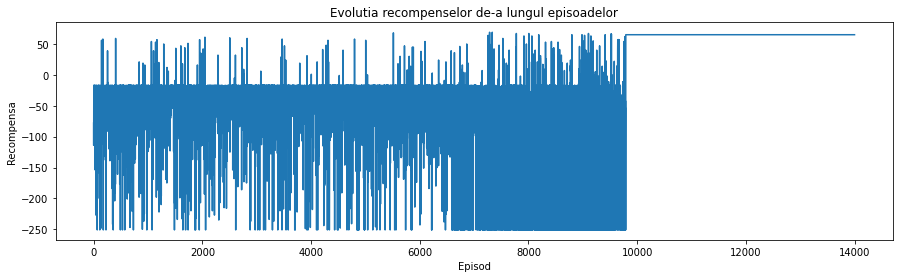

In [ ]:
# VIZUALIZARE
fig, (reward_plot) = plt.subplots(1)

fig.set_figwidth(15)

reward_plot.plot(rewards)
reward_plot.set_xlabel('Episod')
reward_plot.set_ylabel('Recompensa')
reward_plot.set_title('Evolutia recompenselor de-a lungul episoadelor')

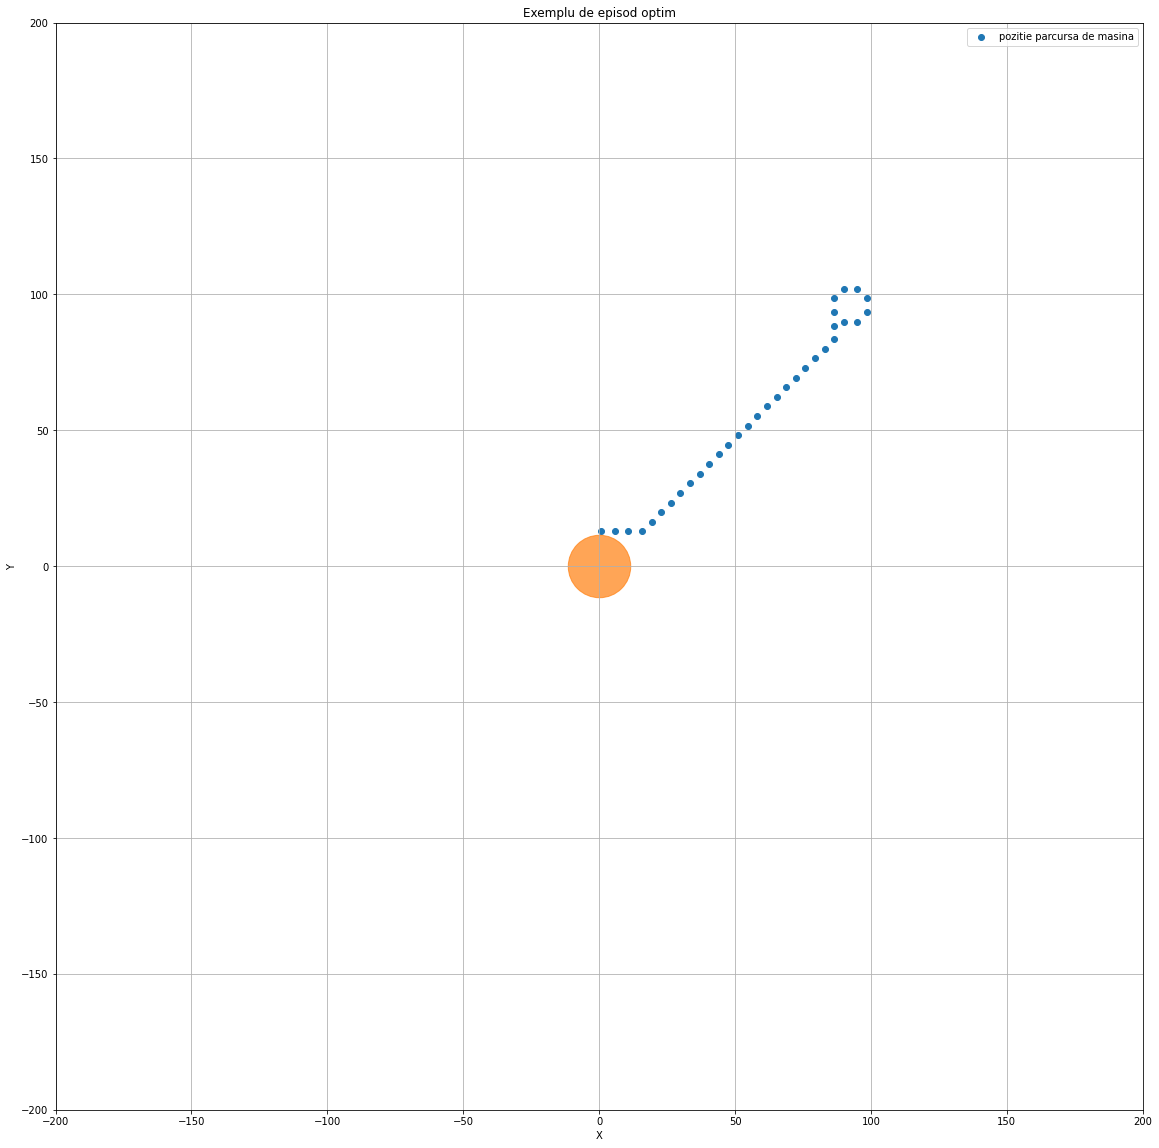

In [ ]:
fig, (position_plot) = plt.subplots(1)
fig.set_figheight(20)
fig.set_figwidth(20)

xs = []
ys = []
for pos in best_agent_positions:
  x, y = pos
  xs.append(x)
  ys.append(y) 

position_plot.scatter(xs, ys, label="pozitie parcursa de masina")
position_plot.scatter(location_position[0], location_position[1], s=location_size * 300, alpha=0.7)
position_plot.axis([-max_distance, max_distance, -max_distance, max_distance])
position_plot.set_aspect('equal', 'box')
position_plot.grid()
position_plot.set_xlabel('X')
position_plot.set_ylabel('Y')
position_plot.legend()
position_plot.set_title('Exemplu de episod optim')
plt.show()